In [ ]:
# www.instagram.com 회원 가입, 
# 로그인을 해야만 크롤링을 할 수 있도록 변경됨

In [76]:
from selenium import webdriver

driver = webdriver.Chrome('chromedriver.exe')

In [77]:
driver.get('http://www.instagram.com')

In [78]:
# 자동 파이썬 로그인\
# ( 자동으로 아이디와 비밀번호 입력후 로그인 기능 막힘)
# 현재는 수동으로 직접 로그인



In [79]:
# 특정 키워드로 검색

word = '제주도맛집'
url = 'https://www.instagram.com/explore/tags/' + word
driver.get(url)

In [80]:
# 첫번째 게시물 클릭

btn_sel = driver.find_element_by_css_selector('#react-root > section > main > article > div.EZdmt > div > div > div:nth-child(1) > div:nth-child(1) > a > div.eLAPa > div._9AhH0')
btn_sel.click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"#react-root > section > main > article > div.EZdmt > div > div > div:nth-child(1) > div:nth-child(1) > a > div.eLAPa > div._9AhH0"}
  (Session info: chrome=87.0.4280.88)


In [ ]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html,'lxml')

In [ ]:
soup

In [ ]:
# 정보 가져오기...

# 본문 분리
try:
    content = soup.select('body > div._2dDPU.CkGkG > div.zZYga > div > article > div.eo2As > div.EtaWk > ul > div > li > div > div > div.C4VMK > span')[0].text
except:
    content = ' '
    


In [ ]:
# 해시테그 분리하기 (정규식 re)
# !pip install re
import re

tags = re.findall(r'#[^\s#,\\]+', content) 
# #으로 시작하고 # 뒤에 연속된 문자(공백#\ 기호가 아닌것)

In [81]:
tags

"['#오늘무지개']"

In [82]:
# 위치정보 분리하기
try:
    place = soup.select('div.M30cS')[0].text
except:
    place = ' '


In [83]:
data = [content, place, tags]

In [84]:
data

['(광고)제주에서 만나는 진짜제주감성🤎맛집중에 맛집! Best of best! 제주 구좌읍 성산일출봉 근처에 위치한 “이스트포레스트” 로!!🙋🏽\u200d♀️ 비주얼도좋고 맛은 더좋은 전복리조또와 누룽지파스타,문어파스타 등 메뉴들과인스타감성 재대로뿜뿜인 인테리어와 노을뷰....♥️여기, NO.1 노을맛집 분위기맛집 추가요🙋🏽\u200d♀️ ☑️주차가능☑️매일11:00~20:00(매주 수요일휴무)☑️전화예약 (064-784-3789)☑️제주시 구좌읍 종달로1길 26-1☑️사장님이 너무 친절해서 더 좋았던♥️#제주도맛집#구좌읍맛집 #구좌맛집 #성산일출봉맛집 #성산맛집 #종달리맛집 #제주맛집 #제주도맛집 #세화맛집 #월정리맛집 #미로공원맛집 #빛의벙커맛집 #만장굴맛집 #비자림맛집 #우도맛집 #종달리수국 #에코랜드맛집 #성산게스트하우스 #제주맛집추천 #제주분위기맛집 #제주노을맛집',
 '',
 "['#오늘무지개']"]

In [85]:
# 게시글 정보 가져오기 함수
# from bs4 import BeautifulSoup
# !pip install re
# import re

def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    # 본문 분리
    try:
        content = soup.select('body > div._2dDPU.CkGkG > div.zZYga > div > article > div.eo2As > div.EtaWk > ul > div > li > div > div > div.C4VMK > span')[0].text
    except:
        content = ' '
    
    # 해시테그 분리하기 (정규식 re)
    tags = re.findall(r'#[^\s#,\\]+', content) 
    
    # 위치정보 분리하기
    try:
        place = soup.select('div.M30cS')[0].text
    except:
        place = ' '
        
    #데이터 정리    
    data = [content, place, tags]
    
    return data


In [ ]:
# 다음 게시물 여는 함수

def move_next(driver):
    right = driver.find_element_by_css_selector('body > div._2dDPU.CkGkG > div.EfHg9 > div > div > a._65Bje.coreSpriteRightPaginationArrow')
    right.click()
    
move_next(driver)

In [87]:
# 여러 페이지 함수 돌려서 수집하기    50
import time

word = '제주도맛집'   # 검색어 변경 가능
target = 50

url = 'https://www.instagram.com/explore/tags/' + word
driver.get(url)
time.sleep(3)

btn_sel = driver.find_element_by_css_selector('#react-root > section > main > article > div.EZdmt > div > div > div:nth-child(1) > div:nth-child(1) > a > div.eLAPa > div._9AhH0')
btn_sel.click()

results = []
for i in range(target):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
        time.sleep(2)
    except:
        time.sleep(2)
        move_next(driver)



In [88]:
print(results[:5])

[[' ', ' ', []], ['(광고)제주에서 만나는 진짜제주감성🤎맛집중에 맛집! Best of best! 제주 구좌읍 성산일출봉 근처에 위치한 “이스트포레스트” 로!!🙋🏽\u200d♀️ 비주얼도좋고 맛은 더좋은 전복리조또와 누룽지파스타,문어파스타 등 메뉴들과인스타감성 재대로뿜뿜인 인테리어와 노을뷰....♥️여기, NO.1 노을맛집 분위기맛집 추가요🙋🏽\u200d♀️ ☑️주차가능☑️매일11:00~20:00(매주 수요일휴무)☑️전화예약 (064-784-3789)☑️제주시 구좌읍 종달로1길 26-1☑️사장님이 너무 친절해서 더 좋았던♥️#제주도맛집#구좌읍맛집 #구좌맛집 #성산일출봉맛집 #성산맛집 #종달리맛집 #제주맛집 #제주도맛집 #세화맛집 #월정리맛집 #미로공원맛집 #빛의벙커맛집 #만장굴맛집 #비자림맛집 #우도맛집 #종달리수국 #에코랜드맛집 #성산게스트하우스 #제주맛집추천 #제주분위기맛집 #제주노을맛집', '', ['#제주도맛집', '#구좌읍맛집', '#구좌맛집', '#성산일출봉맛집', '#성산맛집', '#종달리맛집', '#제주맛집', '#제주도맛집', '

In [89]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content', 'place','tags']

In [90]:
results_df


,content,place,tags
0,,,[]
1,(광고)제주에서 만나는 진짜제주감성🤎맛지...,,"[#제주도맛집, #구좌읍맛집, #구좌맛집, #..."
2,(광고)지만 꼭 추천해주고 싶은제주도 먹부림 코스!⠀시작은 역시👏제주도 흑돼지로제주...,,"[#제주도맛집, #제주가볼만한곳, #제주애월맛집, #제주핫플, #제주도카페맛집, #..."
3,맑은 날의 연속으로 기분도 맑아져요! #제주맛집 #제주도맛집 #월정리맛집 #월정리카...,,"[#제주맛집, #제주도맛집, #월정리맛집, #월정리카페, #월정리, #함덕맛집, #..."
4,제주공항과 애월사이에 있는바다뷰♥이춘옥원조고등어쌈밥입니다.요즘 포장문의가 많네요^^...,,"[#애월맛집, #제주도맛집, #이춘옥, #애월해안도로맛집, #제주도민맛집, #애월점..."
5,제주 애월 맛집! 이춘옥원조고등어쌈밥!애월과 공항사이! 바다뷰 테라스에서👍가족식사에...,,"[#제주맛집, #제주도맛집, #애월맛집, #제주가족식사, #제주도핫플레이스, #제주..."
6,⠀겨울❄️제주여행✈️으로 좋은 1박2일 제주도여행 정복기⁉️공항에서 젤 가까운 시크...,환상의 섬 Jeju Island,"[#함덕맛집, #제주함덕맛집, #함덕해수욕장맛집, #함덕횟집, #제주함덕횟집, #제..."
7,산도롱맨도롱----------🍜제주 유일무이 고기국수 맛집🍜알싸한 홍갈비국수와크리미...,,"[#제주도맛집, #제주맛집, #제주도고기국수, #성산일출봉맛집, #광치기해변맛집, ..."
8,(광고)제주도 중문 갈치요리 베스트3인세트인데 완전 고퀄 갑성비문어갈치조림...대왕...,형제도식당,"[#제주도맛집, #서귀포맛집, #중문맛집, #제주도가볼만한곳, #중문관광단지맛집, ..."
9,🍊만감교차🍊🏝제주의 만감류를 이용한 이색카페🏡.서귀포시 환해장성로 950.오픈 10...,카페만감교차,"[#제주도, #제주도여행, #제주도날씨, #제주도카페, #제주도카페추천, #제주도살..."


In [91]:
results_df.to_excel('jejudoMat.xlsx', index = False)

In [92]:
rtotal = pd.read_excel('jejudoMat.xlsx')

In [93]:
ttotal = []

for tags in rtotal['tags']:
    tlist = tags[2:-2].split("', '")
    for tag in tlist:
        ttotal.append(tag)


In [94]:
ttotal

['',
 '#제주도맛집',
 '#구좌읍맛집',
 '#구좌맛집',
 '#성산일출봉맛집',
 '#성산맛집',
 '#종달리맛집',
 '#제주맛집',
 '#제주도맛집',
 '#세화맛집',
 '#월정리맛집',
 '#미로공원맛집',
 '#빛의벙커맛집',
 '#만장굴맛집',
 '#비자림맛집',
 '#우도맛집',
 '#종달리수국',
 '#에코랜드맛집',
 '#성산게스트하우스',
 '#제주맛집추천',
 '#제주분위기맛집',
 '#제주노을맛집',
 '#제주도맛집',
 '#제주가볼만한곳',
 '#제주애월맛집',
 '#제주핫플',
 '#제주도카페맛집',
 '#애월카페',
 '#제주도데이트',
 '#제주도흑돼지맛집',
 '#제주공항횟집',
 '#제주흑돼지맛집',
 '#제주애월카페',
 '#제주맛집',
 '#제주도맛집',
 '#월정리맛집',
 '#월정리카페',
 '#월정리',
 '#함덕맛집',
 '#성산맛집',
 '#세화맛집',
 '#구좌맛집',
 '#바다',
 '#맑은날',
 '#맑은하늘',
 '#해',
 '#애월맛집',
 '#제주도맛집',
 '#이춘옥',
 '#애월해안도로맛집',
 '#제주도민맛집',
 '#애월점심',
 '#애월아침식사',
 '#제주애월맛집',
 '#이호테우해변맛집',
 '#언제나행복',
 '#제주맛집',
 '#제주도맛집',
 '#애월맛집',
 '#제주가족식사',
 '#제주도핫플레이스',
 '#제주밥집',
 '#애월밥집',
 '#제주애월맛집',
 '#고등어쌈밥',
 '#이춘옥원조고등어쌈밥',
 '#애월가볼만한곳',
 '#함덕맛집',
 '#제주함덕맛집',
 '#함덕해수욕장맛집',
 '#함덕횟집',
 '#제주함덕횟집',
 '#제주도맛집',
 '#제주맛집

In [95]:
from collections import Counter
tag_counts = Counter(ttotal)

In [96]:
tag_counts.most_common(30)

[('#제주도맛집', 39),
 ('#제주도여행', 21),
 ('#제주도핫플레이스', 20),
 ('#애월카페', 19),
 ('#제주도카페투어', 18),
 ('#제주카페', 16),
 ('#신화월드', 15),
 ('#아이와함께', 15),
 ('#감귤체험', 15),
 ('#동물카페', 15),
 ('#오설록', 15),
 ('#뽀로로테마파크', 15),
 ('#원앤온리', 15),
 ('#제주동물카페', 15),
 ('#어린왕자감귤밭', 15),
 ('#제주이쁜카페', 15),
 ('#귤체험', 15),
 ('#감귤밭', 15),
 ('#아이와제주여행', 15),
 ('#더클리프', 15),
 ('#히든클리프', 15),
 ('#아이와가볼만한곳', 15),
 ('#제주도감귤체험', 15),
 ('#제주감귤체험', 15),
 ('#협재해수욕장', 15),
 ('#제주아이와갈만한곳', 15),
 ('#제주감성카페', 15),
 ('#제주신화월드', 15),
 ('#서귀포감귤체험', 15),
 ('#감귤체험농장', 15)]

In [97]:
# 막대 차트로 그리기

import matplotlib.pyplot as plt
import seaborn as sns


tag_counts_df = pd.DataFrame(tag_counts.most_common(30))
tag_counts_df.columns = ['tags','counts']

In [98]:
tag_counts_df

,tags,counts
0,#제주도맛집,39
1,#제주도여행,21
2,#제주도핫플레이스,20
3,#애월카페,19
4,#제주도카페투어,18
5,#제주카페,16
6,#신화월드,15
7,#아이와함께,15
8,#감귤체험,15
9,#동물카페,15


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


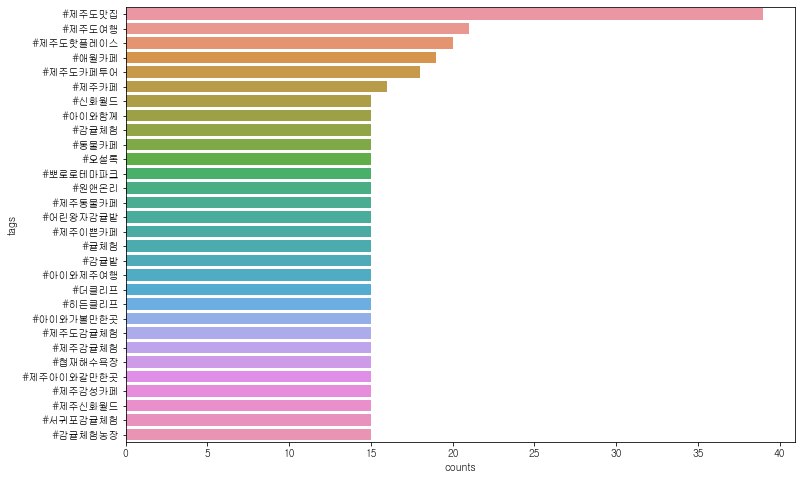

In [99]:
# 막대 그리프 그리기 

from matplotlib import font_manager, rc
f_name = font_manager.FontProperties(fname='C:/Windows/Fonts/NGULIM.ttf').get_name()
rc('font',family=f_name)

plt.figure(figsize = (12,8))
sns.barplot('counts', 'tags', data = tag_counts_df)


plt.show()

In [100]:
tc =tag_counts.most_common(20)

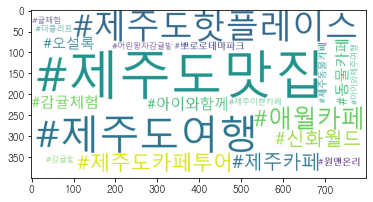

In [101]:
# 워드 클라우드 
#!pip install WordCloud

from wordcloud import WordCloud
import numpy as np
from PIL import Image

tc = tag_counts.most_common(30)
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      background_color = 'white',
                      max_words=20,
                      width = 800,
                      height = 400).generate_from_frequencies(dict(tc))
plt.imshow(wordcloud)

In [110]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

tc = tag_counts.most_common(30)
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      background_color = 'white',
                      max_words=30,
                      width = 800,
                      height = 400,
                      mask = np.array(Image.open('11.png'))).generate_from_frequencies(dict(tc))
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)


FileNotFoundError: [Errno 2] No such file or directory: '11.jpg'

In [105]:
!pip install stylecloud

In [106]:
import stylecloud

In [ ]:
stylecloud.gen_stylecloud(file_path="test.txt",

                                             icon_name="fas fa-dog",

                                             palette="colorbrewer.diverging.Spectral_11",

                                             background_color='black',

                                             gradient="horizontal",

                                             output_name="test.png")